In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_context('poster')
import pandas as pd # for data-preprocessing and exploration 
import numpy as np

import matplotlib.pyplot as plt # for data-visualization 
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor # Used to check importance of each feature(Here)
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor # used for prediction 
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning 
from sklearn import metrics

import pickle

In [2]:
df = pd.read_excel('Final_v2.xlsx')
df.head()

,name,price,km,owner,year,fuel,location
0,Honda City VX Diesel,1025000,"24,000 KMs",1 Owner,2018,Diesel,Delhi
1,Honda City ZX VTEC,299000,"76,347 KMs",2 Owners,2007,Petrol,Bangalore
2,Honda WR-V VX MT Diesel,750000,"41,855 KMs",1 Owner,2017,Diesel,Navi Mumbai
3,Honda Civic 1.8V AT,320000,"66,867 KMs",1 Owner,2007,Petrol,Hyderabad
4,Honda City 1.5 V AT,350000,"57,409 KMs",2 Owners,2011,Petrol,Mumbai


In [7]:
len(df['location'].unique())



40

In [8]:
df['location'].value_counts()

Mumbai                866
Delhi                 445
Hyderabad             435
Bangalore             321
Pune                  266
Chennai               243
Ahmedabad             146
Kolkata               135
Thane                 131
Coimbatore            118
Jaipur                 60
Nashik                 56
Bhopal                 53
Noida                  49
Navi Mumbai            47
Gurgaon                35
Faridabad              33
Ghaziabad              28
Thiruvananthapuram     24
Mangalore              23
Bellary                23
Mysore                 22
Kollam                 22
Aurangabad             22
Lucknow                12
Nagpur                 12
Pondicherry            10
Indore                  7
Karnal                  7
Kalamassery             6
Surat                   6
Kochi                   5
Tiruchirappalli         5
Vadodara                5
Jamshedpur              4
Raipur                  3
Akola                   2
Ranchi                  2
Rajkot      

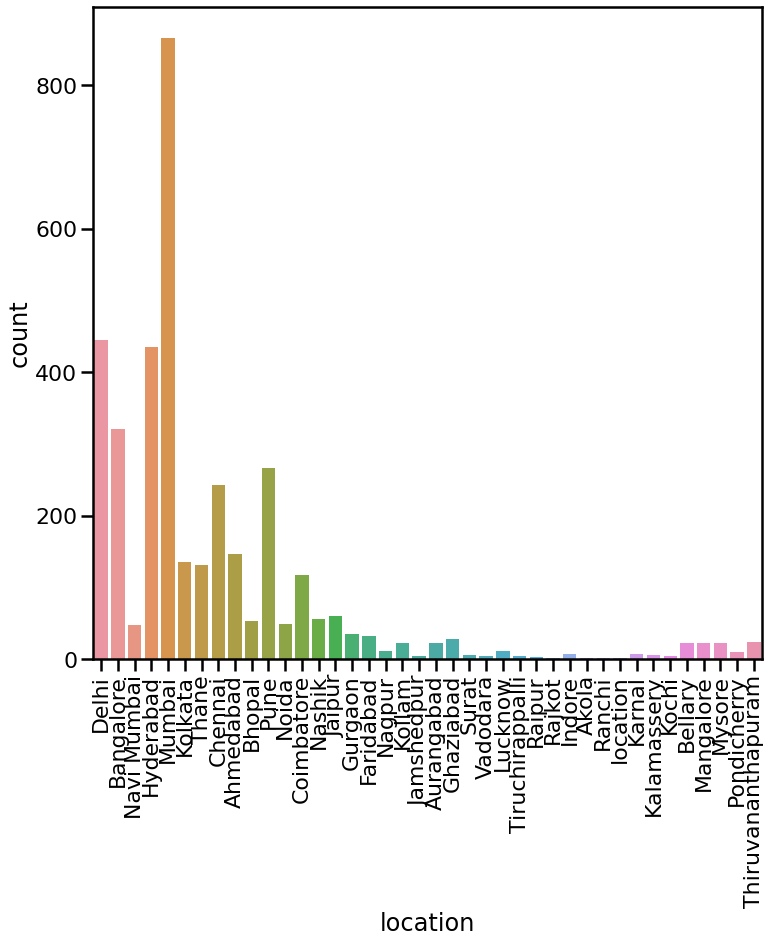

In [6]:
plt.figure(figsize=(12,12))
sns.countplot(x='location',data= df)
plt.xticks(rotation=90)
plt.show()

In [5]:

df["location"].replace({"Ghaziabad": "Delhi","Faridabad": "Delhi","Noida":"Delhi","Gurgaon":"Delhi"}, inplace=True)

df["location"].replace({"Thane": "Mumbai","Navi Mumbai": "Mumbai","Pune":"Mumbai"}, inplace=True)
df["location"].replace({"Tiruchirappalli":"Chennai"},inplace=True)
df["location"].replace({"Kalamassery":"Thiruvananthapuram","Kochi":"Thiruvananthapuram","Kollam":"Thiruvananthapuram"},inplace=True)

In [6]:
#DRopping the Ahmedabad as it has very few records
df.drop(df[df['location']=="Ahmedabad"].index, inplace = True)

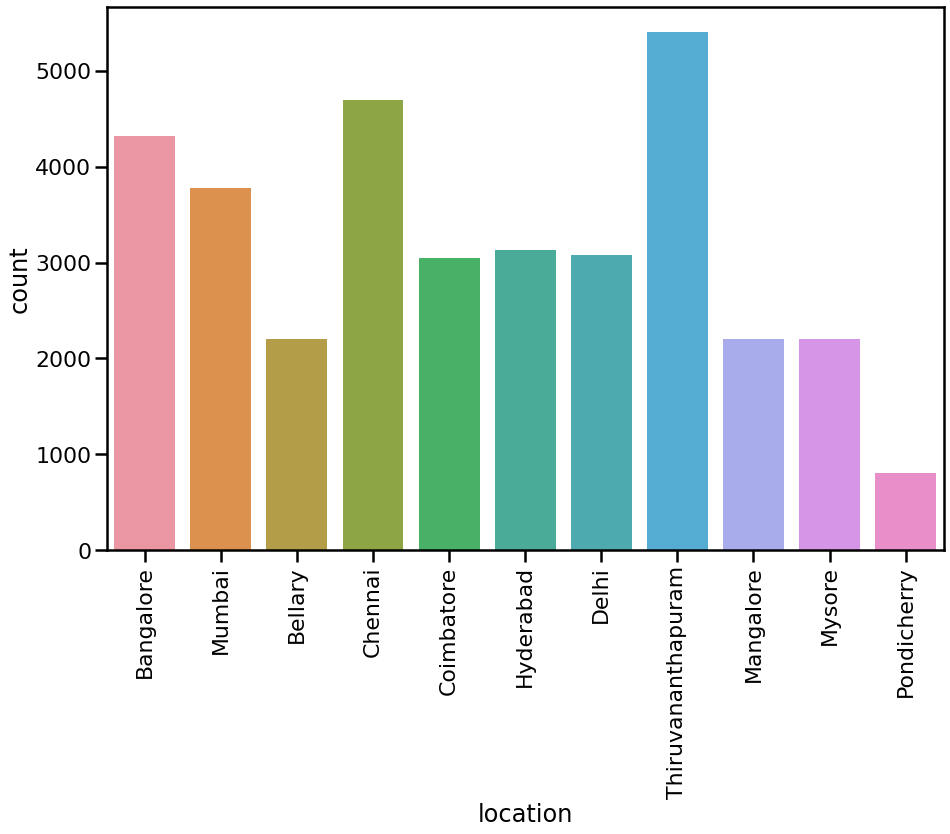

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(x='location',data= df)
plt.xticks(rotation=90)
plt.show()

In [8]:
df.head()

,name,price,km,owner,year,fuel,location
0,Mahindra TUV300 T6 Plus,"5,95,000","1,80,585 KMs",1 Owner,2015,Diesel,Bangalore
1,Toyota Fortuner 2.8 4x2 MT [2016-2020],"32,99,000","22,510 KMs",1 Owner,2019,Diesel,Bangalore
2,Ford Endeavour Sport 2.0 4x4 AT,"40,00,000","19,631 KMs",1 Owner,2020,Diesel,Bangalore
3,Mahindra XUV500 W11(O) [2018-2020],"18,45,000","46,081 KMs",1 Owner,2018,Diesel,Bangalore
4,Mercedes-Benz C-Class C 220d Progressive [2018...,"49,00,000","2,266 KMs",NaN,2020,Diesel,Bangalore


In [11]:
len(df['name'].unique())

680

In [14]:
df['name'].unique()

array(['Mahindra TUV300 T6 Plus',
       'Toyota Fortuner 2.8 4x2 MT [2016-2020]',
       'Ford Endeavour Sport 2.0 4x4 AT',
       'Mahindra XUV500 W11(O) [2018-2020]',
       'Mercedes-Benz C-Class C 220d Progressive [2018-2019]',
       'Ford EcoSport Trend + 1.5L Ti-VCT AT',
       'Hyundai Grand i10 Sports Edition 1.2L Kappa VTVT',
       'Mercedes-Benz E-Class 270 CDI',
       'Renault Duster 110 PS RXZ 4X2 AMT Diesel', 'Toyota Etios VXD',
       'Maruti Suzuki Alto LXi BS-III', 'Hyundai Xcent S AT 1.2',
       'Hyundai Sonata 2.4 GDi AT', 'BMW X1 sDrive20d xLine',
       'Hyundai Elite i20 Magna 1.4 CRDI [2016-2017]',
       'Maruti Suzuki Celerio VXi AMT', 'Tata Nexon XZ Plus Diesel',
       'Mahindra XUV500 W11 AT', 'Audi Q5 3.0 TDI quattro Premium Plus',
       'Hyundai Grand i10 Sportz 1.2 Kappa VTVT [2013-2016]',
       'Nissan Terrano XL (D)',
       'Hyundai Grand i10 Asta 1.2 Kappa VTVT (O) [2013-2017]',
       'Hyundai Elite i20 Asta 1.2 (O) [2016]', 'Skoda Superb L&K T

In [ ]:
df['current_price']=df